# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Random Forest Classification Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

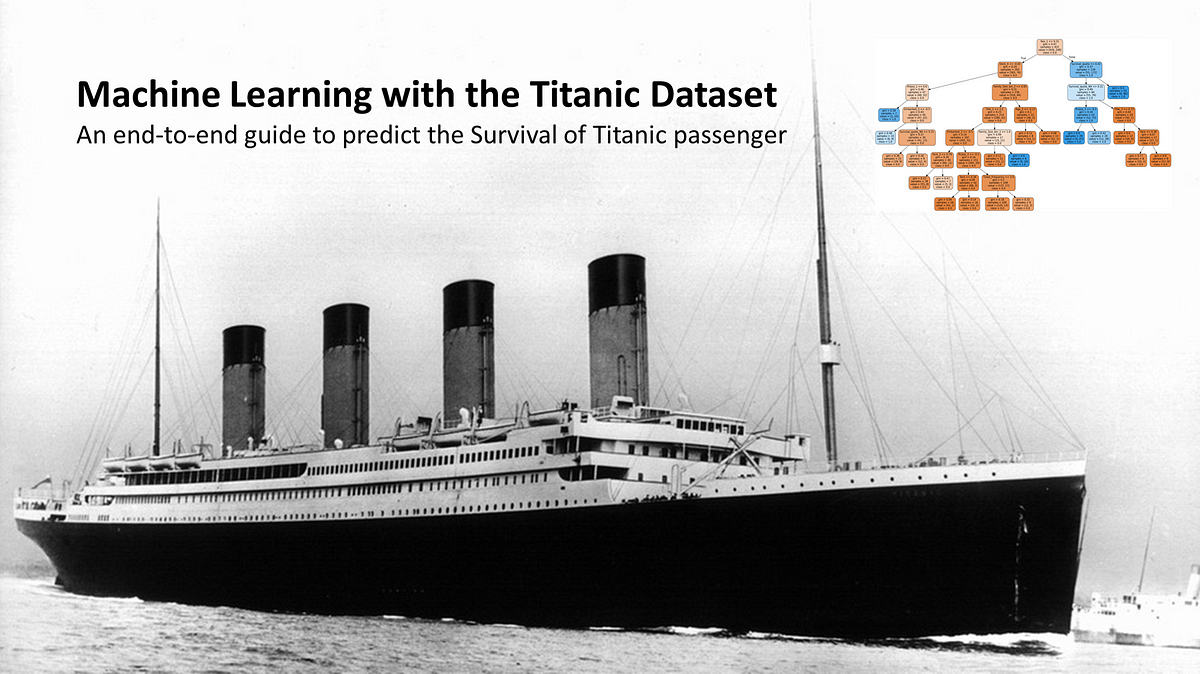

Makine öğrenmesi dünyasının meşhur problemi (bir proje) olan Titanic data seti ile tanışmaya hoş geldiniz arkadaşlar. Bu projemiz bir Kaggle Projesi olup sıklıkla kullanılan bir gerçek dünya data setidir. Data seti ile ilgili açıklamaya alttaki linkten ulaşabilirsiniz.

https://www.kaggle.com/c/titanic/overview

Bu problemde amacımız https://www.kaggle.com/c/titanic/overview linkindeki görevi yerine getirmek.

**Önemli Not:** Kaggle yarışmalarında bazen data,
* train data
* test data
olarak ayrı verilir.

Buradaki test data bizim model oluştururken kullanacağımız test data değildir.

Bu test data Kaggle'in yarışma sonuçları test etmek için kullandığı datadır.

Dolayısı ile bu test data içinde target variable yani gerçek label değeri (grand truth) bulunmaz.

Bu sebeple kendi model doğruluğumuzu ölçerken bu test datayı kullanamayacağınızdan mevcut train data ile train_test_split yaparak kendi test datanızı oluşturmayı unutmayın!

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Read Data

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preparation and Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df[df.Age < 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [6]:
df[df.Age > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [7]:
for feature in df.drop(["Name", "Ticket"], axis = 1).columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['male' 'female']
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q' nan]


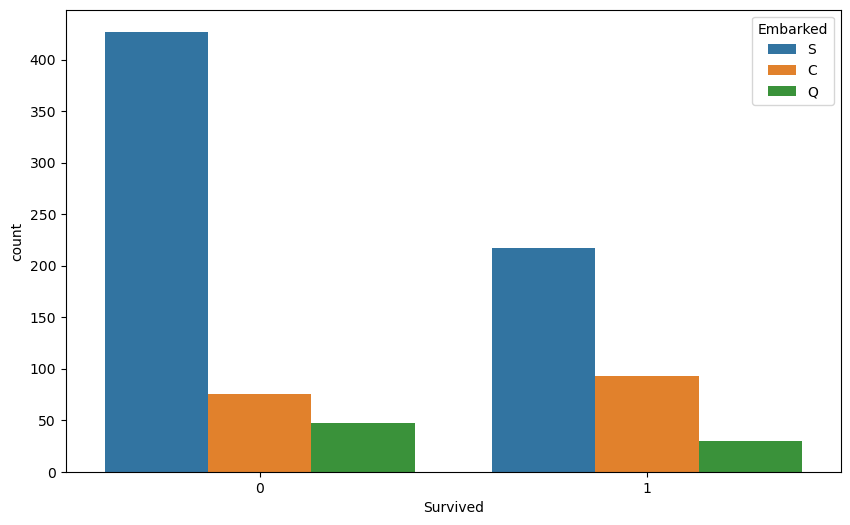

In [8]:
sns.countplot(x="Survived", data = df, hue = "Embarked");

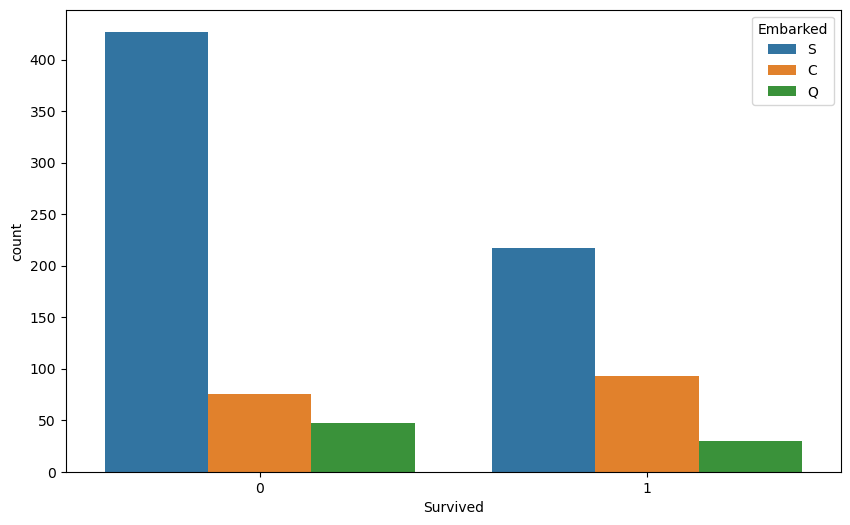

In [9]:
sns.countplot(x="Survived", data = df, hue = "Embarked");

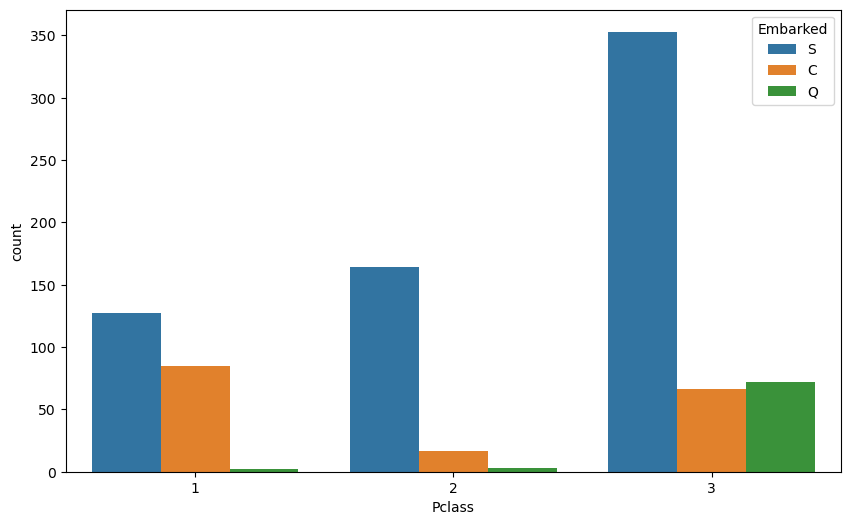

In [10]:
sns.countplot(x="Pclass", data = df, hue = "Embarked");

In [11]:
df.drop(["PassengerId", "Name", "Ticket" ,"Cabin"], axis= 1, inplace=True)
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
99,0,2,male,34.0,1,0,26.0,S


In [12]:
df[(df.Embarked != "Q") & (df.Embarked != "C") & (df.Embarked != "S")]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [13]:
df['Embarked'] = df['Embarked'].fillna('S')

In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [16]:
df['Age'] = df['Age'].fillna(30)

In [17]:
df.isnull().sum().any()

False

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
from sklearn.preprocessing import OrdinalEncoder
cat = df.select_dtypes("object").columns
cat

Index(['Sex', 'Embarked'], dtype='object')

In [20]:
df[cat]

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [21]:
enc = OrdinalEncoder()
df[cat] = enc.fit_transform(df[cat])
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


In [22]:
# male = 1 , feamale = 0  *-**-*   C = 0 ,  Q = 1 ,  S = 2

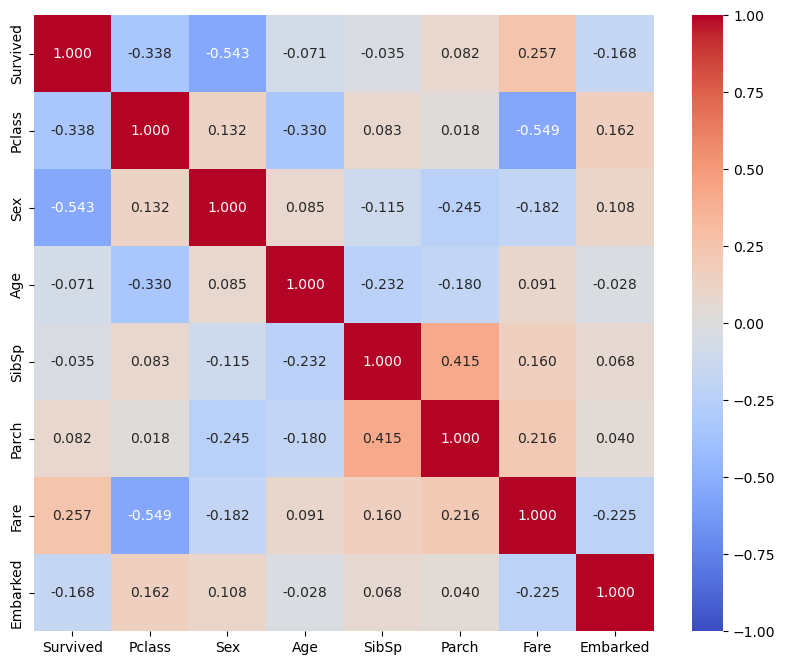

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

<Figure size 1200x600 with 0 Axes>

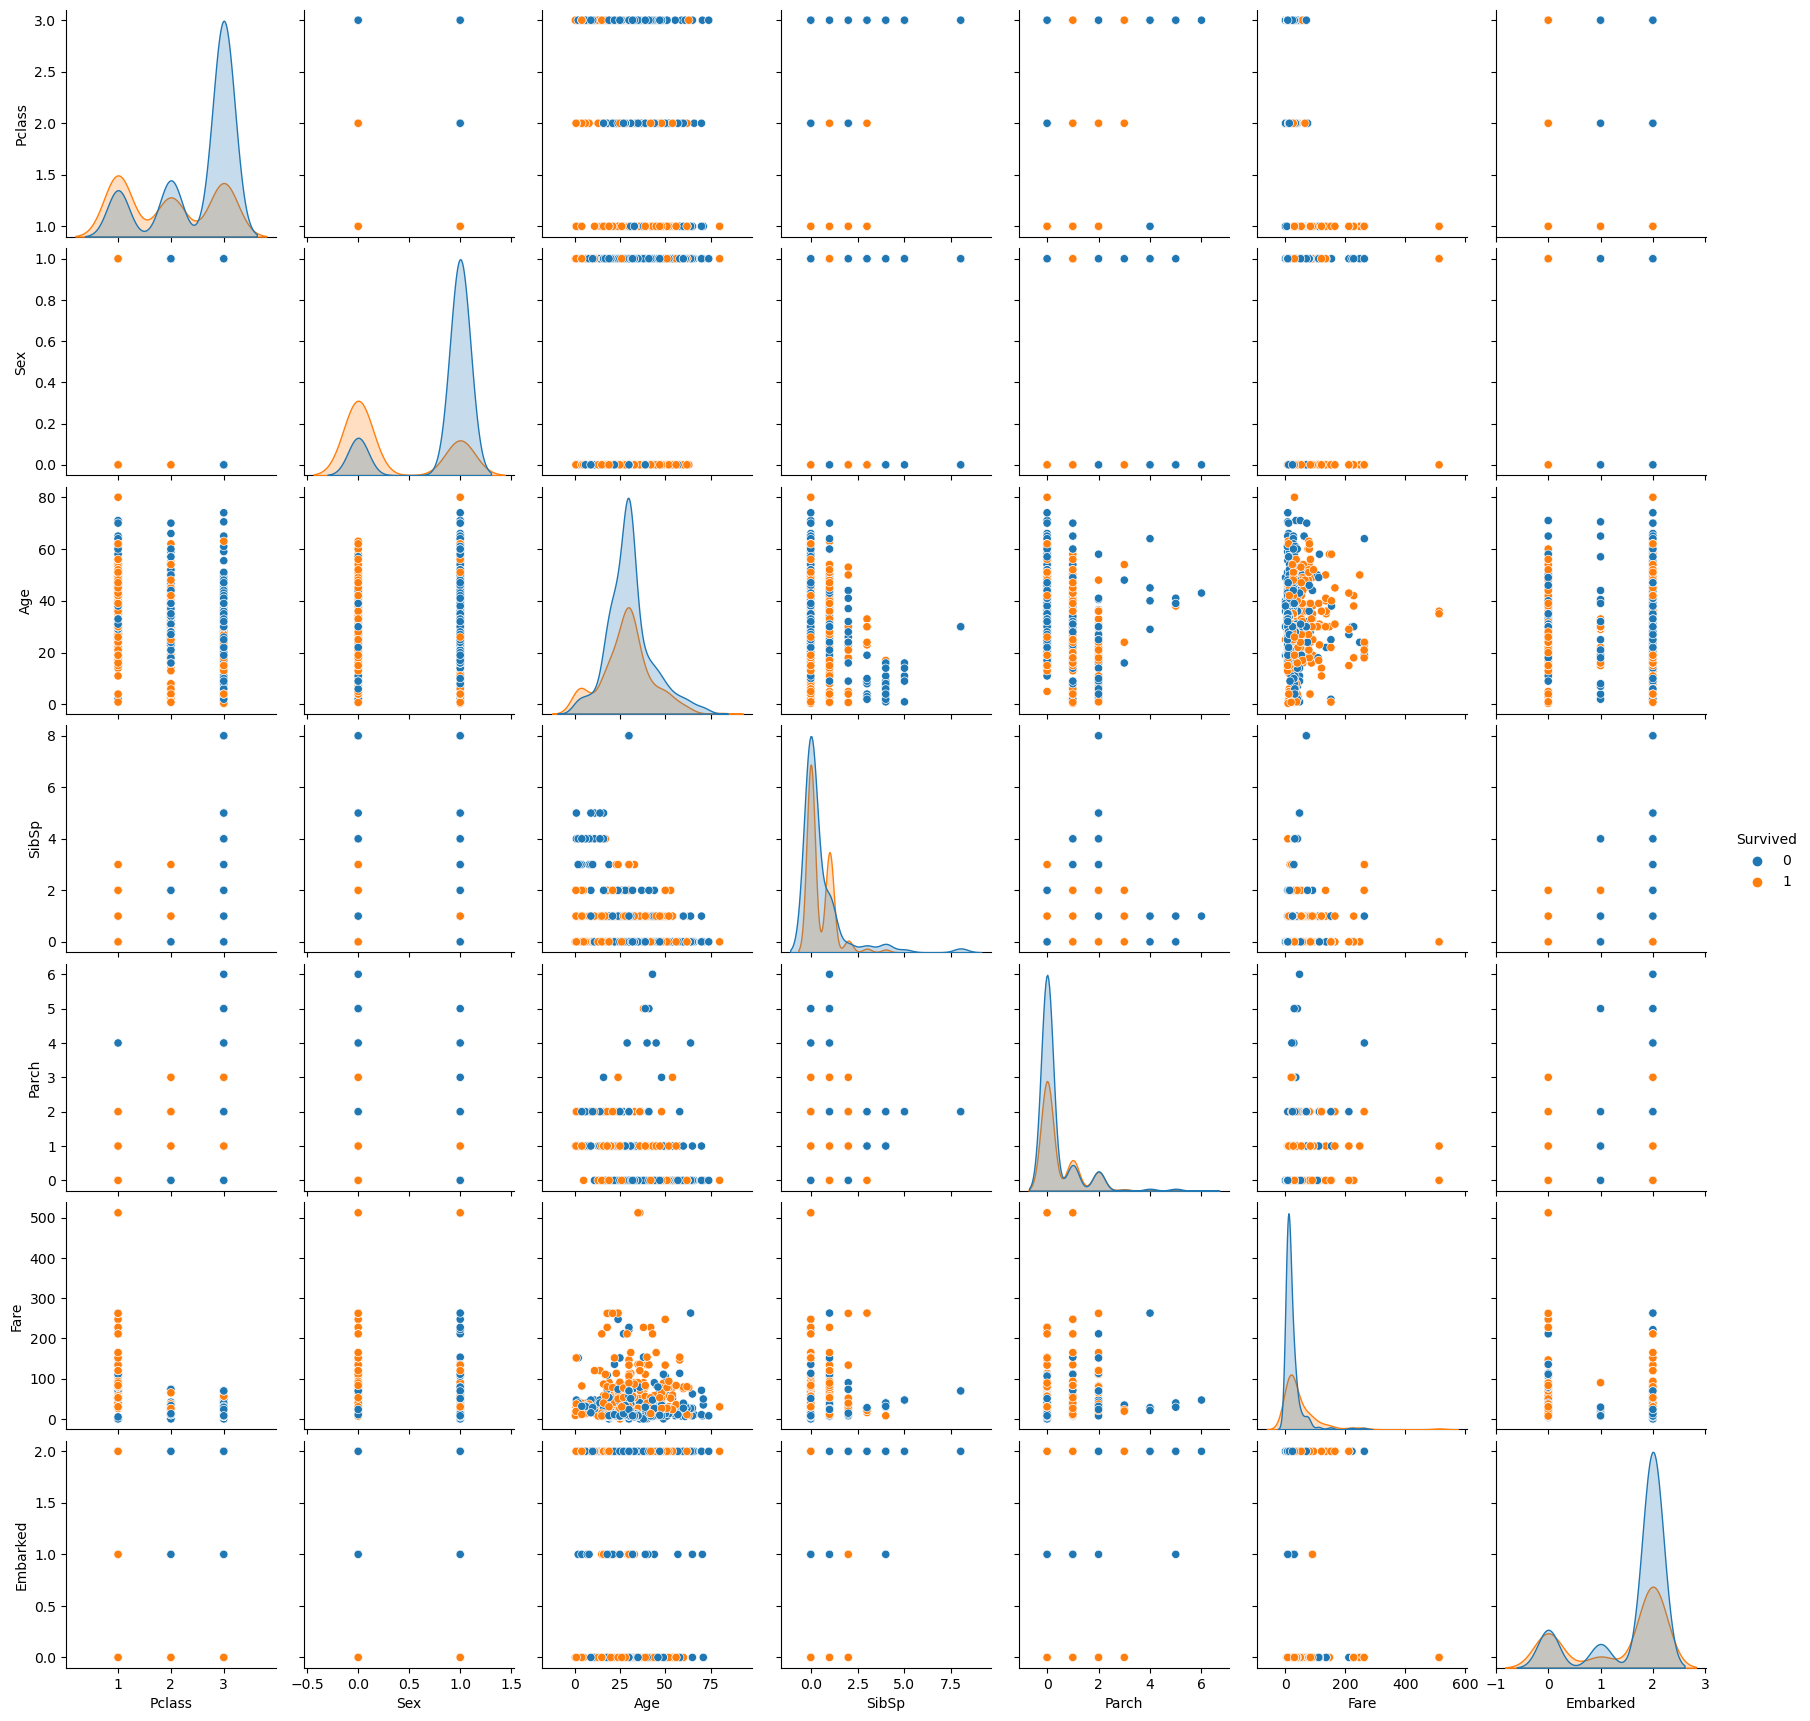

In [24]:
plt.figure(figsize=(12,6))
sns.pairplot(df , hue='Survived');

## Train | Test Split

In [25]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.213, random_state=47, stratify= y)

## Modelling | Model Performance

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state = 47) # n_estimators= 64, 128, 500 ve 1000 i dene

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=47)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [30]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[94 23]
 [18 55]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       117
           1       0.71      0.75      0.73        73

    accuracy                           0.78       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.79      0.78      0.79       190


Train_Set
[[425   7]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       432
           1       0.97      0.98      0.98       269

    accuracy                           0.98       701
   macro avg       0.98      0.98      0.98       701
weighted avg       0.98      0.98      0.98       701



In [31]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer, PrecisionRecallDisplay

model = RandomForestClassifier(class_weight = "balanced", random_state=47)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.814527
test_precision_micro    0.814527
test_recall_micro       0.814527
test_f1_micro           0.814527
dtype: float64

In [32]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Fare,0.274468
Sex,0.258370
Age,0.252252
Pclass,0.085219
SibSp,0.052889
Parch,0.043861
Embarked,0.032941


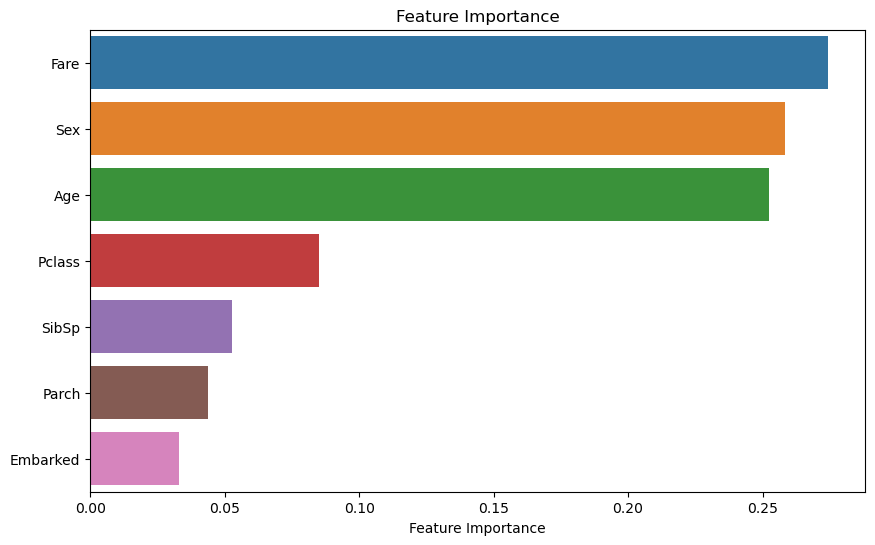

In [33]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[57,64],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[3],
             'max_depth':[5],
             'min_samples_split':[2]}

In [35]:
model = RandomForestClassifier(class_weight = "balanced", random_state=47)
rf_grid_model = GridSearchCV(model, 
                             param_grid,
                             scoring = "accuracy",
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [36]:
rf_grid_model.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 57}

In [37]:
rf_grid_model.best_score_

0.8316413373860183

In [38]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 25]
 [17 56]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       117
           1       0.69      0.77      0.73        73

    accuracy                           0.78       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.79      0.78      0.78       190


Train_Set
[[378  54]
 [ 47 222]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       432
           1       0.80      0.83      0.81       269

    accuracy                           0.86       701
   macro avg       0.85      0.85      0.85       701
weighted avg       0.86      0.86      0.86       701



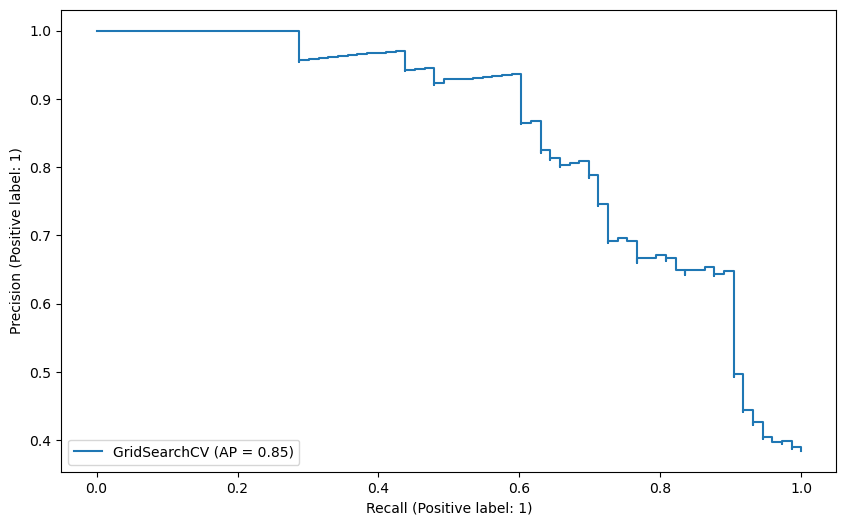

In [39]:
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test, y_test);

# Final Model and Prediction

In [40]:
final_model = RandomForestClassifier(max_depth= 5, max_features= 3, min_samples_split= 2, n_estimators= 57).fit(X, y)

In [41]:
import pickle
pickle.dump(final_model, open("final_model_RF_Titanic", "wb"))

In [42]:
df_test = pd.read_csv("test.csv")

In [43]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
df_test.drop(["PassengerId", "Name", "Ticket" ,"Cabin"], axis= 1, inplace=True)
df_test.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
167,3,male,18.0,2,2,34.375,S


In [45]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [46]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [47]:
df_test['Age'] = df_test['Age'].fillna(30)

In [48]:
df_test[df_test.Fare.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [49]:
df_test['Fare'] = df_test['Fare'].fillna(7.0000)

In [50]:
df_test.isnull().sum().any()

False

In [51]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [52]:
cat2 = df_test.select_dtypes("object").columns
cat2

Index(['Sex', 'Embarked'], dtype='object')

In [53]:
df_test[cat2] = enc.transform(df_test[cat2])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,1.0
1,3,0.0,47.0,1,0,7.0000,2.0
2,2,1.0,62.0,0,0,9.6875,1.0
3,3,1.0,27.0,0,0,8.6625,2.0
4,3,0.0,22.0,1,1,12.2875,2.0


|||||||<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>|||||||

In [54]:
import pickle
final_model =pickle.load(open("final_model_RF_Titanic", "rb"))

In [55]:
predictions = final_model.predict(df_test)
predictions_proba = final_model.predict_proba(df_test)

In [56]:
df_test["pred"] = predictions
df_test["pred_proba"] = predictions_proba[:,1]
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,pred,pred_proba
0,3,1.0,34.5,0,0,7.8292,1.0,0,0.096975
1,3,0.0,47.0,1,0,7.0000,2.0,0,0.351546
2,2,1.0,62.0,0,0,9.6875,1.0,0,0.135279
3,3,1.0,27.0,0,0,8.6625,2.0,0,0.112557
4,3,0.0,22.0,1,1,12.2875,2.0,1,0.512672
...,...,...,...,...,...,...,...,...,...
413,3,1.0,30.0,0,0,8.0500,2.0,0,0.111300
414,1,0.0,39.0,0,0,108.9000,0.0,1,0.969015
415,3,1.0,38.5,0,0,7.2500,2.0,0,0.078214
416,3,1.0,30.0,0,0,8.0500,2.0,0,0.111300


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THE END</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |